In [ ]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 788kB 9.0MB/s 
     |████████████████████████████████| 368kB 15.6MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
     |████████████████████████████████| 122kB 8.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.


In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-320.tgz

--2021-04-20 17:26:23--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328003750 (313M) [application/x-tar]
Saving to: ‘imagewoof-320.tgz’

imagewoof-320.tgz   100%[===================>] 312.81M  86.9MB/s    in 3.6s    

2021-04-20 17:26:26 (86.9 MB/s) - ‘imagewoof-320.tgz’ saved [328003750/328003750]



In [2]:
!tar -xvzf /content/imagewoof-320.tgz
!mkdir Save_dir

Streaming output truncated to the last 5000 lines.
imagewoof-320/train/n02088364/n02088364_11835.JPEG
imagewoof-320/train/n02088364/n02088364_1980.JPEG
imagewoof-320/train/n02088364/n02088364_17534.JPEG
imagewoof-320/train/n02088364/n02088364_13179.JPEG
imagewoof-320/train/n02088364/n02088364_9520.JPEG
imagewoof-320/train/n02088364/n02088364_8011.JPEG
imagewoof-320/train/n02088364/n02088364_14055.JPEG
imagewoof-320/train/n02088364/n02088364_3071.JPEG
imagewoof-320/train/n02088364/n02088364_16588.JPEG
imagewoof-320/train/n02088364/n02088364_16207.JPEG
imagewoof-320/train/n02088364/n02088364_13712.JPEG
imagewoof-320/train/n02088364/n02088364_1503.JPEG
imagewoof-320/train/n02088364/n02088364_18343.JPEG
imagewoof-320/train/n02088364/n02088364_72.JPEG
imagewoof-320/train/n02088364/n02088364_5871.JPEG
imagewoof-320/train/n02088364/n02088364_8739.JPEG
imagewoof-320/train/n02088364/n02088364_232.JPEG
imagewoof-320/train/n02088364/n02088364_10523.JPEG
imagewoof-320/train/n02088364/n02088364_842

In [3]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-g57ab14y
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-g57ab14y
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp37-none-any.whl size=20030 sha256=a93cac48da01aaa7b2bcb3f2236d59f89bea78f8bfedc3d6a15535ec2938ffaf
  Stored in directory: /tmp/pip-ephem-wheel-cache-lsqm5x29/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [4]:
!pip install q keras==2.3.1
!pip install q tensorflow==2.1.0
import keras
from tensorflow.keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model#save_weights,load_weights
from keras import optimizers
#from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, BatchNormalization
from classification_models.keras import Classifiers
#import tempfile
import tensorflow as tf
import cv2
import os

     |████████████████████████████████| 378kB 27.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 24kB/s 
     |████████████████████████████████| 3.9MB 44.7MB/s 
     |████████████████████████████████| 450kB 55.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=872189072286dd722998881491aa363fc2e25c45f33a9fc177517361fa0bc738
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled

Using TensorFlow backend.


In [5]:
%matplotlib inline
class Adam_dlr(optimizers.Optimizer):

    """Adam optimizer.
    Default parameters follow those provided in the original paper.
    # Arguments
        split_1: split layer 1
        split_2: split layer 2
        lr: float >= 0. List of Learning rates. [Early layers, Middle layers, Final Layers]
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor. If `None`, defaults to `K.epsilon()`.
        decay: float >= 0. Learning rate decay over each update.
        amsgrad: boolean. Whether to apply the AMSGrad variant of this
            algorithm from the paper "On the Convergence of Adam and
            Beyond".
    # References
        - modifying source code of Adam (https://github.com/keras-team/keras/blob/master/keras/optimizers.py) The code at the link has been updated, and the used code is legacy.
        - [Adam - A Method for Stochastic Optimization](
           https://arxiv.org/abs/1412.6980v8)
        - [On the Convergence of Adam and Beyond](
           https://openreview.net/forum?id=ryQu7f-RZ)
    """

    def __init__(self, split_1, split_2, lr=[1e-7, 1e-4, 1e-2], beta_1=0.9, beta_2=0.999,
                 epsilon=None, decay=0., amsgrad=False, **kwargs):
        super(Adam_dlr, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.learning_rate = K.variable(lr, name='lr')
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            # Extracting name of the split layers
            self.split_1 = split_1.weights[0].name
            self.split_2 = split_2.weights[0].name
        if epsilon is None:
            epsilon = K.epsilon()
        self.epsilon = epsilon
        self.initial_decay = decay
        self.amsgrad = amsgrad

    @keras.optimizers.interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.learning_rate
        if self.initial_decay > 0:
            lr = lr * (1. / (1. + self.decay * K.cast(self.iterations,
                                                      K.dtype(self.decay))))

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        if self.amsgrad:
            vhats = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        else:
            vhats = [K.zeros(1) for _ in params]
        self.weights = [self.iterations] + ms + vs + vhats
        
        # Setting lr of the initial layers
        lr_grp = lr_t[0]
        for p, g, m, v, vhat in zip(params, grads, ms, vs, vhats):
            
            # Updating lr when the split layer is encountered
            if p.name == self.split_1:
                lr_grp = lr_t[1]
            if p.name == self.split_2:
                lr_grp = lr_t[2]
                
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            if self.amsgrad:
                vhat_t = K.maximum(vhat, v_t)
                p_t = p - lr_grp * m_t / (K.sqrt(vhat_t) + self.epsilon) # Using updated lr
                self.updates.append(K.update(vhat, vhat_t))
            else:
                p_t = p - lr_grp * m_t / (K.sqrt(v_t) + self.epsilon)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {
                  'lr': (K.get_value(self.learning_rate)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'epsilon': self.epsilon,
                  'amsgrad': self.amsgrad}
        base_config = super(Adam_dlr, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

class LR_Updater(Callback):
    '''This callback is utilized to log learning rates every iteration (batch cycle)
    it is not extended by LR_Cycle
    '''
    def __init__(self, iterations):
        self.itr = iterations 
        self.ctr = iterations 
        self.epochs = 0
        '''
        iterations = dataset size / batch size
        epochs = pass through full training dataset
        '''
        self.epoch_iterations = iterations
        self.trn_iterations = 0.
        self.history = {}
    def on_train_begin(self, logs={}):
        self.trn_iterations = 0.
        logs = logs or {}
    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.trn_iterations += 1
        #
        self.ctr -= 1
        if self.ctr <= 0:
            self.epochs += 1
            self.model.save("Save_dir/model-{}.h5".format(self.epochs))
            self.ctr = self.itr
        #
        K.set_value(self.model.optimizer.lr, self.setRate())
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
    def plot_lr(self):
        plt.xlabel("iterations")
        plt.ylabel("learning rate")
        plt.plot(self.history['iterations'], self.history['lr'])
    def plot(self, n_skip=10):
        plt.xlabel("learning rate (log scale)")
        plt.ylabel("loss")
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')

        
class LR_Cycle(LR_Updater):
    '''This callback is utilized to implement cyclical learning rates
    it is based on this pytorch implementation https://github.com/fastai/fastai/blob/master/fastai
    and adopted from this keras implementation https://github.com/bckenstler/CLR
    '''
    def __init__(self, iterations, cycle_mult = 1):
        '''
        epoch_iterations = dataset size / batch size
        cycle_iterations = number of iterations in one annealing cycle
        cycle_mult = used to increase the cycle length cycle_mult times after every cycle
        for example: cycle_mult = 2 doubles the length of the cycle at the end of each cycle
        '''
        self.min_lr = 0
        self.cycle_mult = cycle_mult
        self.cycle_iterations = 0.
        super().__init__(iterations)
    def setRate(self):
        '''The function uses cosine annealing. The initial value of Learning rate is set at maximum desired value,
           At each cycle iteration, the value by which to multiply the learning rate is calculated as sec(pi*(cycle_iters/epoch_iters))+1
           As the cycle_iterations increase, the learning rate decreases, untill the cycle iters reach a fraction of the epoch iterations.
           Also, after each cycle is complete, the number of epoch iterations for each batch is increased by a factor, as was suggested in the paper.
        '''
        self.cycle_iterations += 1
        if self.cycle_iterations == int(self.epoch_iterations//2):
            self.cycle_iterations = 0.
            self.epoch_iterations *= self.cycle_mult
        cos_out = np.cos(np.pi*(self.cycle_iterations)/self.epoch_iterations) + 1
        return self.max_lr / 2 * cos_out
    def on_train_begin(self, logs={}):
        super().on_train_begin(logs={})
        self.cycle_iterations = 0.
        self.max_lr = K.get_value(self.model.optimizer.lr)

In [6]:
'''The following is the callback scheduler used for learning-rate initialization.It multiplies the learning rates by
   a multiplying factor, thus taking the learning rate from the starting specified value to the ending one. It does so by
   exp((endLR/startLR),1/(number of times batch will be updated)) 
'''

class LearningRateFinder:
	def __init__(self, model, stopFactor=4, beta=0.98):
		# store the model, stop factor, and beta value (for computing
		# a smoothed, average loss)
		self.model = model
		self.stopFactor = stopFactor
		self.beta = beta
		# initialize list of learning rates and losses,
		# respectively
		self.lrs = []
		self.losses = []
		# initialize learning rate multiplier, average loss, best
		# loss found thus far, current batch number, and weights file
		self.lrMult = [1,1,1]#1
		self.avgLoss = 0
		self.bestLoss = 1e9
		self.batchNum = 0
		self.weightsFile = 'Save_dir/Model-weights'
	def on_batch_end(self, batch, logs):
		# The current learning rate is added to the list of
		# learning rates which have been used
		lr = K.get_value(self.model.optimizer.lr)
		self.lrs.append(lr)
		l = logs["loss"]
		self.batchNum += 1
		self.avgLoss = (self.beta * self.avgLoss) + ((1 - self.beta) * l)
		smooth = self.avgLoss / (1 - (self.beta ** self.batchNum))
		self.losses.append(smooth)
		# compute the maximum loss stopping factor value
		stopLoss = self.stopFactor * self.bestLoss
		# check to see whether the loss has grown too large
		if self.batchNum > 1 and smooth > stopLoss:
			# stop returning and return from the method
			self.model.stop_training = True
			return
		# check to see if the best loss should be updated
		if self.batchNum == 1 or smooth < self.bestLoss:
			self.bestLoss = smooth
		# increase the learning rate
		lr[0] *= self.lrMult[0]
		lr[1] *= self.lrMult[1]
		lr[2] *= self.lrMult[2]
		K.set_value(self.model.optimizer.lr, lr)
	def find(self, trainData, startLR, endLR, epochs=None,
		stepsPerEpoch=None, batchSize=32, sampleSize=2048,
		verbose=1):
		# compute the total number of batch updates that will occur
		numBatchUpdates = epochs * stepsPerEpoch
		# derive the learning rate multiplier based on the ending
		# learning rate, starting learning rate, and total number of
		# batch updates
		self.lrMult[0] = (endLR[0] / startLR[0]) ** (1.0 / numBatchUpdates)
		self.lrMult[1] = (endLR[1] / startLR[1]) ** (1.0 / numBatchUpdates)
		self.lrMult[2] = (endLR[2] / startLR[2]) ** (1.0 / numBatchUpdates)
		self.model.save_weights(self.weightsFile)
		# Save original learning rate (toreset it, and then set the starting learning rate)
		origLR = K.get_value(self.model.optimizer.lr)
		K.set_value(self.model.optimizer.lr, startLR)
		# construct a callback that will be called at the end of each
		# batch, to increase learning rate as training
		# progresses
		callback = LambdaCallback(on_batch_end=lambda batch, logs:
			self.on_batch_end(batch, logs))
		self.model.fit(
				x=trainData,
				steps_per_epoch=stepsPerEpoch,
				epochs=epochs,
				verbose=verbose,
				callbacks=[callback])
		# restore the original model weights and learning rate
		self.model.load_weights(self.weightsFile)
		K.set_value(self.model.optimizer.lr, origLR)
	def plot_loss(self, skipBegin=10, skipEnd=1):
		# grab the learning rate and losses values to plot
		lrs = self.lrs[skipBegin:-skipEnd]
		losses = self.losses[skipBegin:-skipEnd]
		# plot the learning rate vs. loss
		plt.plot(lrs, losses)
		plt.xscale("log")
		plt.xlabel("Learning Rate (Log Scale)")
		plt.ylabel("Loss")

In [7]:
# Resizing data to 320,320, and feeding to memory in order to calculate channel wise mean and std_deviation for normalization:
# (x-x_mean)/x_std_deviation, across the entire batch.
batch_size = 64
num_classes = 10
epochs = 3

path = 'imagewoof-320'
total = {'train':[],'val':[]}
tot = {'train':[],'val':[]}
for folder in os.listdir(path):
    for category in os.listdir(path + '/' + folder):
        for item in os.listdir(path + '/' + folder+'/'+category):
            obj_path = path + '/' + folder+'/'+category+'/'+item
            obj = cv2.imread(obj_path)
            obj = cv2.resize(obj,(128,128))
            total[folder].append(obj)
            tot[folder].append(category)
x_train = total['train']
x_test = total['val']
y_train,y_test = tot['train'],tot['val']
x_train,x_test = np.array(x_train).reshape(len(x_train),128,128,3),np.array(x_test).reshape(len(x_test),128,128,3)
#y_train,y_test = to_categorical(y_train),to_categorical(y_test)
lb = LabelBinarizer()
y_train,y_test = lb.fit_transform(y_train),lb.transform(y_test)

In [8]:
print(x_train.shape)
print(y_train.shape)

(12454, 128, 128, 3)
(12454, 10)


In [9]:
checkpoint_path_1 = "Save_dir/cp.ckpt"
save_path = 'Save_dir'
# input image dimensions
img_rows, img_cols = 128,128

model_split_1 = 'stage2_unit2_conv1'
model_split_2 = 'fc_start'

In [10]:
# Function for cutout augmentation. Finally, the augmentations applied include:
"""
 1. 4 random cutouts of 20*20
 2. width shift of 5 percent pixels on either side, along with same height shift.
 3. A horizontal flip with 50% chance.
"""
def apply_mask(image, size=12, n_squares=4):
    h, w, channels = image.shape
    #new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        #new_image[y1:y2,x1:x2,:] = 0
        image[y1:y2,x1:x2,:] = 0
    #return new_image
    return image

train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode="constant",
    horizontal_flip=0.5,
    preprocessing_function = apply_mask 
    )
validation_datagen = ImageDataGenerator(
    #rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
    )

train_datagen.fit(x_train)
#validation_datagen.fit(x_test)
validation_datagen.fit(x_train)
train_generator = train_datagen.flow(
        x_train,
        y_train,
        batch_size=batch_size
        )
validation_generator = validation_datagen.flow(
        x_test,
        y_test,
        batch_size=batch_size
        )

In [11]:
ResNet18, preprocess_input = Classifiers.get('resnet18')
base_model = ResNet18((128,128,3),include_top = False,weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', name = 'fc_start')(x)
#x = Dropout(0.20)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
out = Dense(num_classes, activation='softmax', name = 'output')(x)  #num_classes: number of classes in the dataset

model = Model(inputs=base_model.input, outputs=[out])

# Extracting layers at which split is made
split_layer_1 = [layer for layer in model.layers if layer.name == model_split_1][0]

split_layer_2 = [layer for layer in model.layers if layer.name == model_split_2][0]

# Implementing Differential Learning
opt = Adam_dlr(split_1 = split_layer_1, split_2 = split_layer_2,
               lr = [1e-11, 1e-10, 1e-9])

# Implementing CLR: STochaistic Gradient Descent with Restarts.
sched = LR_Cycle(iterations = np.ceil(x_train.shape[0]/batch_size),cycle_mult = 2)

'''
checkpoint_callback_1 = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path_1, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch')
'''
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"])

44924928/44920640 [==============================] - 1s 0us/step


In [ ]:
lrf = LearningRateFinder(model)
lrf.find(
		train_generator,
		[1e-11,1e-10,1e-9], [1e-5,1e-2,1e+1],
    epochs = epochs,
		stepsPerEpoch=np.ceil(x_train.shape[0]/batch_size),
		batchSize=batch_size)
	# plot the loss for the various learning rates and save the
	# resulting plot to disk

Epoch 1/2
195/195 [==============================] - 61s 312ms/step - loss: 3.7081 - accuracy: 0.0971
Epoch 2/2
195/195 [==============================] - 51s 264ms/step - loss: 3.6864 - accuracy: 0.0976


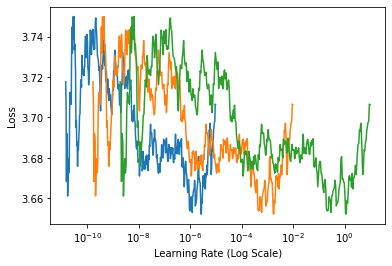

In [ ]:
lrf.plot_loss()

In [ ]:
print(K.get_value(model.optimizer.lr))

In [ ]:
model.save_weights(save_path+'Model-test')


In [12]:
lr_arr = [1e-13, 1e-7, 1e-2]
#lr_arr = np.arr(lr_arr)
opt = Adam_dlr(split_1 = split_layer_1, split_2 = split_layer_2,
               lr = lr_arr)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
model.load_weights(save_path + 'Model-test')

In [ ]:
#from keras.callbacks import ReduceLROnPlateau

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
#                              patience=1, min_lr=1e-14)

In [13]:
#history = model.fit(train_generator,epochs=10,verbose = 1,callbacks=[reduce_lr],validation_data = validation_generator)
history = model.fit(train_generator,epochs=10,verbose = 1,callbacks=[sched],validation_data = validation_generator)

Epoch 1/10
195/195 [==============================] - 63s 322ms/step - loss: 2.5773 - accuracy: 0.1878 - val_loss: 2.5571 - val_accuracy: 0.1000
Epoch 2/10
195/195 [==============================] - 51s 264ms/step - loss: 2.5748 - accuracy: 0.1844 - val_loss: 2.9628 - val_accuracy: 0.1000
Epoch 3/10
195/195 [==============================] - 52s 266ms/step - loss: 2.5780 - accuracy: 0.1853 - val_loss: 2.8056 - val_accuracy: 0.1200
Epoch 4/10
195/195 [==============================] - 52s 266ms/step - loss: 2.5816 - accuracy: 0.1833 - val_loss: 3.9595 - val_accuracy: 0.1600
Epoch 5/10
195/195 [==============================] - 52s 266ms/step - loss: 2.5753 - accuracy: 0.1865 - val_loss: 3.5128 - val_accuracy: 0.1480
Epoch 6/10
195/195 [==============================] - 52s 266ms/step - loss: 2.5701 - accuracy: 0.1905 - val_loss: 6.3715 - val_accuracy: 0.1140
Epoch 7/10
195/195 [==============================] - 52s 267ms/step - loss: 2.5932 - accuracy: 0.1822 - val_loss: 3.0468 - val_ac

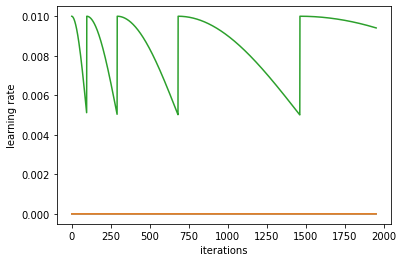

In [14]:
sched.plot_lr()

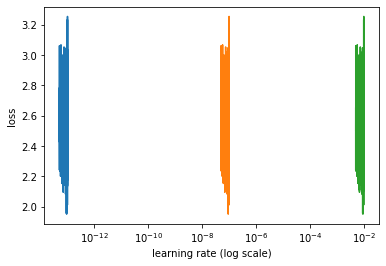

In [16]:
sched.plot()

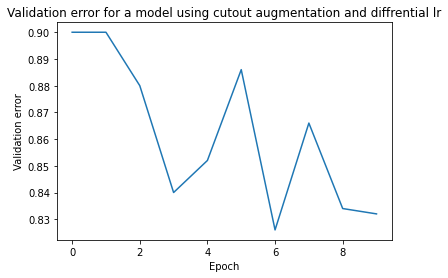

In [15]:
val_acc = history.history['val_accuracy']
plt.plot([1 - acc for acc in val_acc])
plt.title('Validation error for a model using cutout augmentation and diffrential lr')
plt.ylabel('Validation error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#lr_arr = [1e-13, 1e-7, 1e-2]
lr_arr = [1e-7, 1e-4, 1e-2]
#lr_arr = np.arr(lr_arr)
opt = Adam_dlr(split_1 = split_layer_1, split_2 = split_layer_2,
               lr = lr_arr)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator,epochs=15,verbose = 1,callbacks=[sched],validation_data = validation_generator)

Epoch 1/15
195/195 [==============================] - 63s 321ms/step - loss: 2.7317 - accuracy: 0.1571 - val_loss: 2.5647 - val_accuracy: 0.0980
Epoch 2/15
195/195 [==============================] - 50s 256ms/step - loss: 2.7579 - accuracy: 0.1556 - val_loss: 2.8440 - val_accuracy: 0.1080
Epoch 3/15
195/195 [==============================] - 51s 261ms/step - loss: 2.7696 - accuracy: 0.1604 - val_loss: 2.8921 - val_accuracy: 0.1160
Epoch 4/15
195/195 [==============================] - 52s 267ms/step - loss: 2.7505 - accuracy: 0.1549 - val_loss: 3.1329 - val_accuracy: 0.1300
Epoch 5/15
195/195 [==============================] - 51s 264ms/step - loss: 2.7768 - accuracy: 0.1529 - val_loss: 3.2269 - val_accuracy: 0.1260
Epoch 6/15
195/195 [==============================] - 52s 265ms/step - loss: 2.7377 - accuracy: 0.1592 - val_loss: 5.2932 - val_accuracy: 0.1120
Epoch 7/15
195/195 [==============================] - 52s 266ms/step - loss: 2.7197 - accuracy: 0.1583 - val_loss: 2.5429 - val_ac

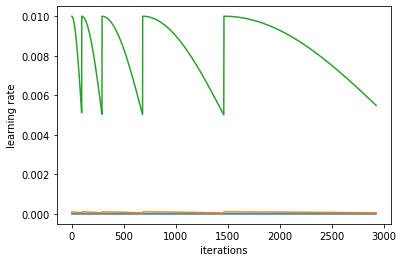

In [ ]:
sched.plot_lr()

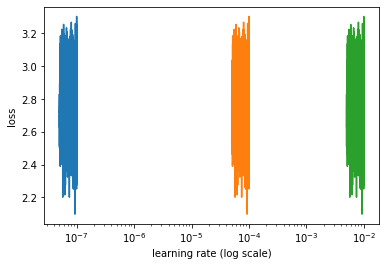

In [ ]:
sched.plot()

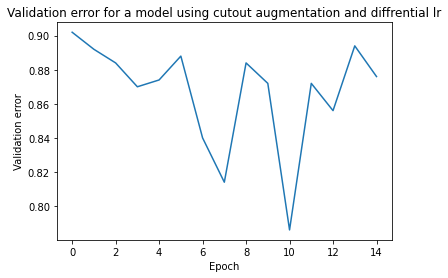

In [ ]:
val_acc = history.history['val_accuracy']
plt.plot([1 - acc for acc in val_acc])
plt.title('Validation error for a model using cutout augmentation and diffrential lr')
plt.ylabel('Validation error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
import pickle
with open('trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


In [ ]:
from keras.callbacks import LearningRateScheduler
class Reduce_on_Plateau(Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.val_losses = []
  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    print('loss:{}'.format(self.losses[-1]))
    print('val-loss:{}'.format(self.val_losses[-1]))
  def on_epoch_begin(self,epoch,logs={}):
    self.epoch_losses = []
    self.epoch_val_losses = []
  def on_epoch_end(self,epoch,logs={}):
    self.epoch_losses.append(logs.get('loss'))
    self.epoch_val_losses.append(logs.get('val_loss'))
    if len(self.epoch_val_losses) > 1:
      delta = self.epoch_val_losses[-2] - self.epoch_val_losses[-1]
      if delta < 0.01:
        lr = K.get_value(self.model.optimizer.lr)
        lr[0] *= 0.5
        lr[1] *= 0.5
        lr[2] *= 0.5
        K.set_value(self.model.optimizer.lr,lr)
    self.model.save_weights("Save_dir/model-{}".format(epoch))
    print('###Epoch-End-loss:{}###'.format(self.epoch_losses[-1]))
    print('###Epoch-End-Val-loss:{}###'.format(self.epoch_val_losses[-1]))
  #def on_train_begin(self, logs={}):
  #  keys = list(logs.keys())
  #  print("Starting training; got log keys: {}".format(keys))

  #def on_train_end(self, logs={}):
   # keys = list(logs.keys())
    #print("Stop training; got log keys: {}".format(keys))

In [ ]:
#rop = Reduce_on_Plateau()

In [ ]:
history = model.fit(train_generator,epochs=15,verbose = 1,callbacks=[Reduce_on_Plateau()],validation_data = validation_generator)

Streaming output truncated to the last 5000 lines.
val-loss:None
 62/195 [========>.....................] - ETA: 34s - loss: 3.4010 - accuracy: 0.1208loss:3.671851873397827
val-loss:None
 63/195 [========>.....................] - ETA: 34s - loss: 3.3963 - accuracy: 0.1213loss:3.109621286392212
val-loss:None
 64/195 [========>.....................] - ETA: 33s - loss: 3.3884 - accuracy: 0.1226loss:2.8879809379577637
val-loss:None
 65/195 [=========>....................] - ETA: 33s - loss: 3.3879 - accuracy: 0.1224loss:3.3585338592529297
val-loss:None
 66/195 [=========>....................] - ETA: 33s - loss: 3.3874 - accuracy: 0.1222loss:3.3537282943725586
val-loss:None
 67/195 [=========>....................] - ETA: 33s - loss: 3.3895 - accuracy: 0.1227loss:3.5268208980560303
val-loss:None
 68/195 [=========>....................] - ETA: 32s - loss: 3.3892 - accuracy: 0.1230loss:3.37031888961792
val-loss:None
 69/195 [=========>....................] - ETA: 32s - loss: 3.3857 - accuracy:

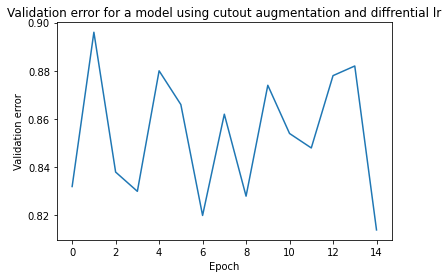

In [ ]:
val_acc = history.history['val_accuracy']
plt.plot([1 - acc for acc in val_acc])
plt.title('Validation error for a model using cutout augmentation and diffrential lr')
plt.ylabel('Validation error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.save_weights('ROP-final')